**Predmet: Principi prezentacije i prepoznavanja oblika**

**Tema: Klasifikacija**

**Student: Lenka Subotin IT23/2018**

# **Klasifikacija**

U sferi mašinskog učenja, klasifikacija predstavlja postupak određivanja tj. predviđanja, pri čemu se za ulazni set podataka, odnosno za svaki ulazni podatak određuje klasa kojoj taj ulazni podatak pripada. Klasifikacija predstavlja zapravo predviđanje kategoričke ciljne promenljive, gde kategoričke promenljive predstavljaju konačan broj vrednosti bez uređenja. Postoje nadgledano i nenadgledano mašinsko učenje, pri čemu se klasifikacija ubraja u kategoriju nadgledanog mašinskog učenja. Npr. prepoznavanje da li se novinski članak tiče ekonomije, sporta ili politike je takođe problem klasifikacije. U okviru mašinskog učenja, konkretno za uspešnost zadatka klasifikacije važno je da set ulaznih podataka bude dovoljno obiman, kao i da podaci unutar seta podataka budu raznovrsni kako bi se dobio dobro istreniran model.  

***Set podataka***

Set podataka sastoji se od slika različitih figurica za koje je potrebno odrediti kojoj klasi pripadaju. Za izradu projektnog zadatka, kako bi se figurice iz seta podataka uspešno klasifikovale, korišćene su unapred istrenirane neuronske mreže: DenseNet121 i ResNet50. Na osnovu istraživanja šta bi bilo najbolje primeniti na dati set podataka, došlo se do zaključka da su DenseNet121 i ResNet50 pravi izbor za projektni zadatak.

***Biblioteke***

Na samom početku izrade projektnog zadatka potrebno je importovati biblioteke koje će biti neophodne za dalju izradu projekta.

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import cv2

import tensorflow as tf
from tensorflow.keras.applications import mobilenet_v2 as tf_mobilenet_v2
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten,Dropout, Dense
from tensorflow.keras.optimizers import Adam

from keras.preprocessing.image import  load_img,img_to_array

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# **Učitavanje seta podataka i analiza podataka**

Set podataka se nalazi na Google Drive-u i potrebno ga je učitati. 

Set podataka se sastoji od 5 foldera: 

*   harry-potter,
*   jurassic-world,
*   marvel,
*   star-wars i
*   test.

Pored navedenih foldera u okviru kojih se nalaze slike, u okviru seta podataka postoje i CSV fajlovi na osnovu kojih se može uvideti koje slike se koriste kao trening, a koje kao test podaci.





In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Kh-5tmaMOTFFx9kCrloM2VbqaBmEE7uW' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Kh-5tmaMOTFFx9kCrloM2VbqaBmEE7uW" -O data.zip && rm -rf /tmp/cookies.txt


--2022-09-04 23:31:11--  https://docs.google.com/uc?export=download&confirm=&id=1Kh-5tmaMOTFFx9kCrloM2VbqaBmEE7uW
Resolving docs.google.com (docs.google.com)... 173.194.69.101, 173.194.69.113, 173.194.69.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.69.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nbcfnn54gc5auj7kpsmncts9qmttiic7/1662334275000/06049624160957438625/*/1Kh-5tmaMOTFFx9kCrloM2VbqaBmEE7uW?e=download&uuid=2eed3049-17e0-4713-b585-7897177b9721 [following]
--2022-09-04 23:31:15--  https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nbcfnn54gc5auj7kpsmncts9qmttiic7/1662334275000/06049624160957438625/*/1Kh-5tmaMOTFFx9kCrloM2VbqaBmEE7uW?e=download&uuid=2eed3049-17e0-4713-b585-7897177b9721
Resolving doc-14-64-docs.googleusercontent.com (doc-14-64-docs.googleusercontent.com)... 142.250.145.132, 

In [ ]:
!unzip data.zip

Archive:  data.zip
  inflating: LICENSE                 
  inflating: harry-potter/0001/001.jpg  
  inflating: harry-potter/0001/002.jpg  
  inflating: harry-potter/0001/003.jpg  
  inflating: harry-potter/0001/004.jpg  
  inflating: harry-potter/0001/005.jpg  
  inflating: harry-potter/0001/006.jpg  
  inflating: harry-potter/0001/007.jpg  
  inflating: harry-potter/0001/008.jpg  
  inflating: harry-potter/0001/009.jpg  
  inflating: harry-potter/0001/010.jpg  
  inflating: harry-potter/0001/011.jpg  
  inflating: harry-potter/0001/012.jpg  
  inflating: harry-potter/0001/013.jpg  
  inflating: harry-potter/0002/001.jpg  
  inflating: harry-potter/0002/002.jpg  
  inflating: harry-potter/0002/003.jpg  
  inflating: harry-potter/0002/004.jpg  
  inflating: harry-potter/0002/005.jpg  
  inflating: harry-potter/0002/006.jpg  
  inflating: harry-potter/0002/007.jpg  
  inflating: harry-potter/0002/008.jpg  
  inflating: harry-potter/0002/009.jpg  
  inflating: harry-potter/0002/010.jpg  


Nakon što je izvršeno unzipovanje seta podataka, učitane su određene slike iz seta podataka: Harry Potter, Star Wars i Marvel.

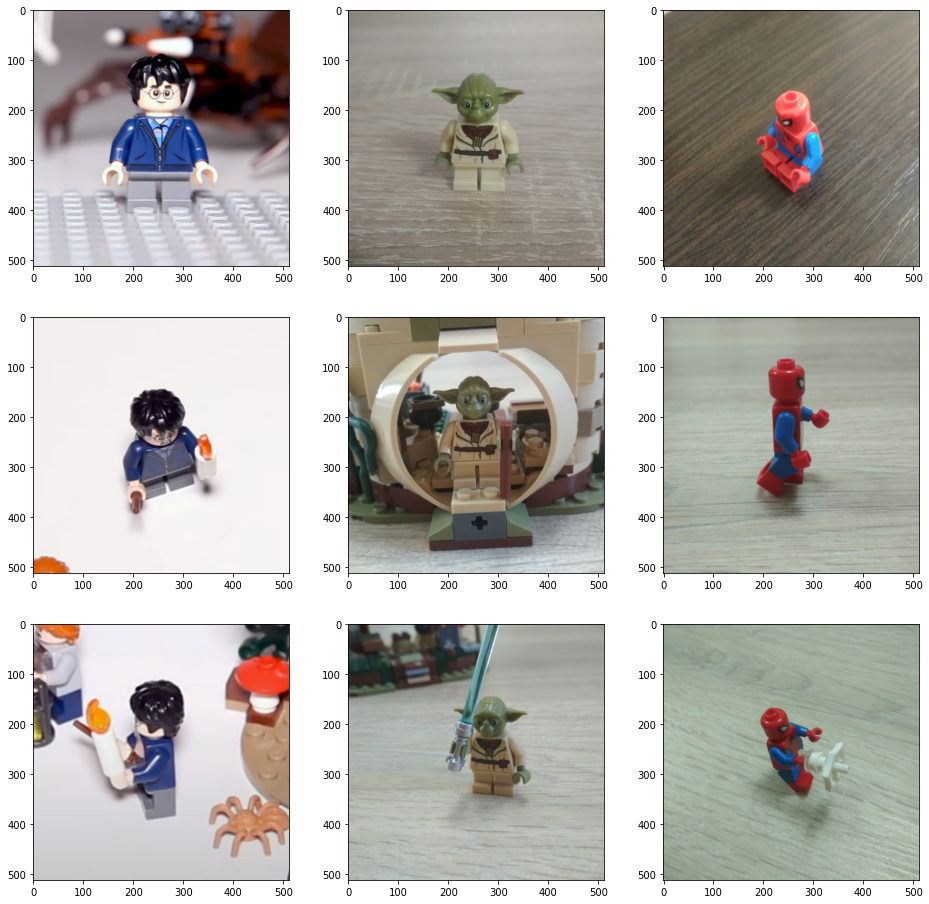

In [ ]:
images = [[],[],[]]
index = ['002', '005', '007']

for i in range(3):
    images[i].append(mpimg.imread('harry-potter/0001/' + index[i] + '.jpg'))
    images[i].append(mpimg.imread('star-wars/0001/' + index[i] + '.jpg'))
    images[i].append(mpimg.imread('marvel/0001/' + index[i] + '.jpg'))

fig, axs = plt.subplots(3,3, figsize=(16,16))

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(images[i][j])

U okviru sledeće ćelije dat je uvid u dimenzije slika, pri čemu se može uočiti da su slike dimenzije 512 x 512, dok broj 3 ukazuje na to da su slike u boji.

In [ ]:
image = load_img("harry-potter/0001/003.jpg")
x=img_to_array(image)
print(x.shape)

(512, 512, 3)


Nakon učitavanja i upoznavanja sa datim setom podataka, potrebno je učitati i CSV fajlove koji se nalaze u okviru seta podataka.

In [ ]:
index_df = pd.read_csv('index.csv')
index_df

path  class_id
0       marvel/0001/001.jpg         1
1       marvel/0001/002.jpg         1
2       marvel/0001/003.jpg         1
3       marvel/0001/004.jpg         1
4       marvel/0001/005.jpg         1
..                      ...       ...
337  star-wars/0014/005.jpg        35
338  star-wars/0014/006.jpg        35
339  star-wars/0014/007.jpg        35
340  star-wars/0014/008.jpg        35
341  star-wars/0014/009.jpg        35

[342 rows x 2 columns]

In [ ]:
metadata_df = pd.read_csv('metadata.csv')
metadata_df

class_id lego_ids                             lego_names  \
0          1  [76115]              ['Spider Mech vs. Venom']   
1          2  [76115]              ['Spider Mech vs. Venom']   
2          3  [76115]              ['Spider Mech vs. Venom']   
3          4  [76115]              ['Spider Mech vs. Venom']   
4          5  [75208]                         ["Yoda's Hut"]   
5          6  [75208]                         ["Yoda's Hut"]   
6          7  [75208]                         ["Yoda's Hut"]   
7          8  [75199]   ["General Grievous' Combat Speeder"]   
8          9  [75199]   ["General Grievous' Combat Speeder"]   
9         10  [75264]    ["Kylo Ren's Shuttle Microfighter"]   
10        11  [75254]  ["AT-ST Raider from The Mandalorian"]   
11        12  [75254]  ["AT-ST Raider from The Mandalorian"]   
12        13  [75254]  ["AT-ST Raider from The Mandalorian"]   
13        14  [75254]  ["AT-ST Raider from The Mandalorian"]   
14        15  [76128]                  ["Molten Man Battle"]   
15        16  [76128]                  ["Molten Man Battle"]   
16        17  [76128]                  ["Molten Man Battle"]   
17        18  [75950]                      ["Aragog's Lair"]   
18        19  [75950]                      ["Aragog's Lair"]   
19        20  [76162]     ["Black Widow's Helicopter Chase"]   
20        21  [76162]     ["Black Widow's Helicopter Chase"]   
21        22  [76162]     ["Black Widow's Helicopter Chase"]   
22        23  [76123]  ["Captain America: Outriders Attack"]   
23        24  [76123]  ["Captain America: Outriders Attack"]   
24        25  [76123]  ["Captain America: Outriders Attack"]   
25        26  [75926]                   ["Pteranodon Chase"]   
26        27  [75926]                   ["Pteranodon Chase"]   
27        28  [76125]             ["Iron Man Hall of Armor"]   
28        29  [76125]             ["Iron Man Hall of Armor"]   
29        30  [76125]             ["Iron Man Hall of Armor"]   
30        31  [76125]             ["Iron Man Hall of Armor"]   
31        32  [75273]       ["Poe Dameron's X-wing Fighter"]   
32        33   [7104]                       ["Desert Skiff"]   
33        34  [75183]         ["Darth Vader Transformation"]   
34        35  [75183]         ["Darth Vader Transformation"]   

                minifigure_name  
0                    SPIDER-MAN  
1                         VENOM  
2                      AUNT MAY  
3                  GHOST SPIDER  
4                          YODA  
5                LUKE SKYWALKER  
6                         R2-D2  
7                    MACE WINDU  
8              GENERAL GRIEVOUS  
9                      KYLO REN  
10              THE MANDALORIAN  
11                    CARA DUNE  
12         KLATOOINIAN RAIDER 1  
13         KLATOOINIAN RAIDER 2  
14                     MYSTERIO  
15                  FIREFIGHTER  
16                   SPIDER-MAN  
17                 HARRY POTTER  
18                  RON WEASLEY  
19                  BLACK WIDOW  
20                YELENA BELOVA  
21                   TASKMASTER  
22              CAPTAIN AMERICA  
23                   OUTRIDER 1  
24                   OUTRIDER 2  
25                   OWEN GRADY  
26  TRACKER TRAQUEUR RASTREADOR  
27                IRON MAN MK 1  
28                IRON MAN MK 5  
29               IRON MAN MK 41  
30               IRON MAN MK 50  
31                       JANNAH  
32                     HAN SOLO  
33                  DARTH VADER  
34             ANAKIN SKYWALKER

Nakon što su učitani index.csv i metadata.csv fajlovi, izvršeno je merge-ovanje ova dva fajla po obeležju *class_id* i dat je uvid u informacije o merge-ovanom fajlu. Iz metadata_df uzeta su samo obeležja *class_id* i *minifigure_name* obeležja.

In [ ]:
data_df = pd.merge(index_df, metadata_df[['class_id', 'minifigure_name']], on='class_id')
data_df

path  class_id   minifigure_name
0       marvel/0001/001.jpg         1        SPIDER-MAN
1       marvel/0001/002.jpg         1        SPIDER-MAN
2       marvel/0001/003.jpg         1        SPIDER-MAN
3       marvel/0001/004.jpg         1        SPIDER-MAN
4       marvel/0001/005.jpg         1        SPIDER-MAN
..                      ...       ...               ...
337  star-wars/0014/005.jpg        35  ANAKIN SKYWALKER
338  star-wars/0014/006.jpg        35  ANAKIN SKYWALKER
339  star-wars/0014/007.jpg        35  ANAKIN SKYWALKER
340  star-wars/0014/008.jpg        35  ANAKIN SKYWALKER
341  star-wars/0014/009.jpg        35  ANAKIN SKYWALKER

[342 rows x 3 columns]

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 341
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   path             342 non-null    object
 1   class_id         342 non-null    int64 
 2   minifigure_name  342 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.7+ KB


Iz merge-ovanog data_df uzet je uzorak od 15 slika tj. figurica, dat je njihov prikaz, pri čemu se na x-osi za svaku figuricu nalazi kompletan naziv konkretne figurice.

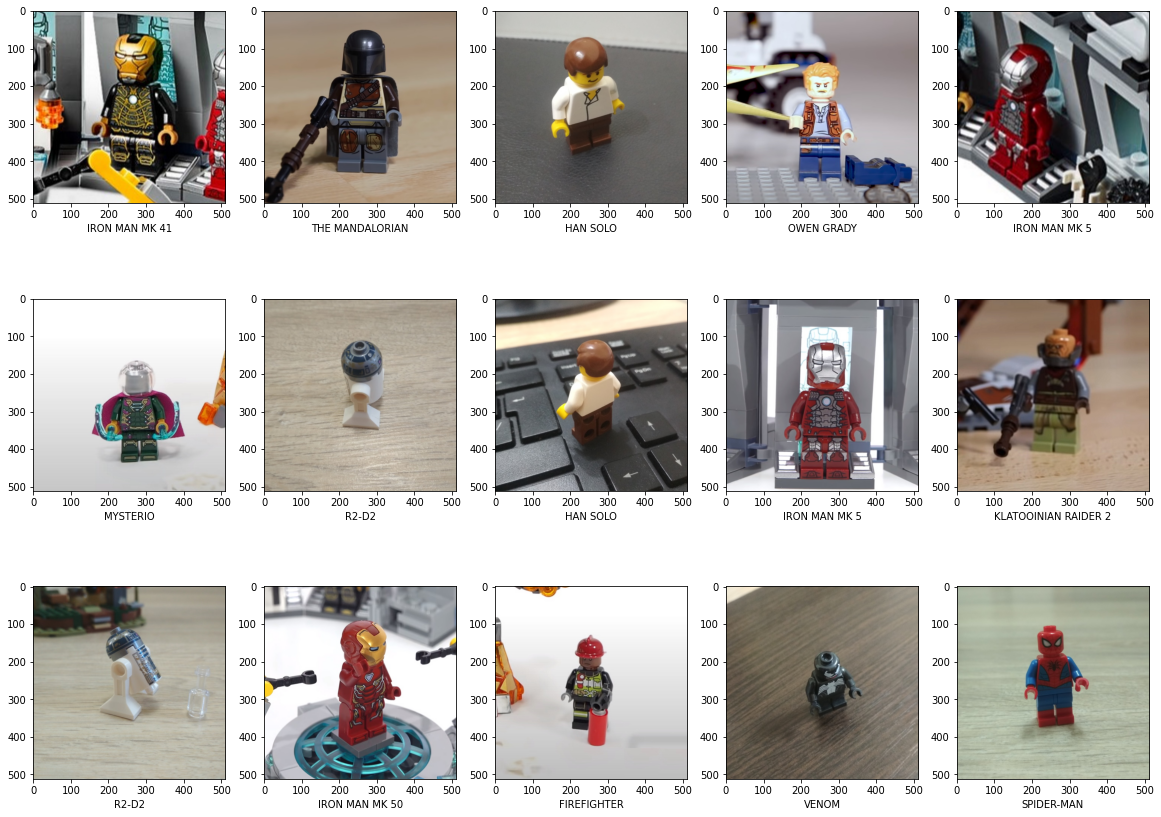

In [ ]:
sample_df=data_df.sample(15)

plt.figure(figsize=(20,15))
i=0
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.grid(False)
    img=load_img(sample_df['path'].values[i])
    plt.imshow(img)
    plt.xlabel(sample_df['minifigure_name'].values[i])
    i += 1
plt.show()

Nakon što su učitane određene figurice, na sledećem grafiku dat je uvid u broj slika po svakoj klasi. 

In [ ]:
import plotly.graph_objects as go
df_count=data_df['minifigure_name'].value_counts().to_frame().reset_index().rename(columns={'index':'minifigure_name','minifigure_name':'Count'})

fig = go.Figure(go.Bar(
    x=df_count['minifigure_name'],y=df_count['Count'],
    marker={'color': df_count['Count'], 
    'colorscale': 'ylgnbu'},  
    text=df_count['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Number of minifigures',xaxis_title="Minifigure Name",yaxis_title="Number",title_x=0.5)
fig.show()

# **Podela podataka na trening i test podatke**

Nakon upoznavanja i analize seta podataka, potrebno je izvršiti podelu seta podataka na trening i validacione podatke. Nakon čitanja test.csv fajla, vrši se brisanje kolone *class_id* i smeštanje test_df u okviru promenljive X_test.
S druge strane, u promenljivu y_test smešta se upravo kolona *class_id*.

In [ ]:
test_df = pd.read_csv('test.csv')
X_test = test_df.drop(columns = ['class_id'])
X_test

path
0   test/001.jpg
1   test/002.jpg
2   test/003.jpg
3   test/004.jpg
4   test/005.jpg
..           ...
65  test/066.jpg
66  test/067.jpg
67  test/068.jpg
68  test/069.jpg
69  test/070.jpg

[70 rows x 1 columns]

In [ ]:
y_test = test_df['class_id']
y_test

0     32
1     32
2     32
3     32
4      1
      ..
65    34
66    34
67    35
68    35
69    35
Name: class_id, Length: 70, dtype: int64

U nastavku je izvršen merge test_df i metadata_df po *class_id*, kao i sortiranje po obeležju path.

In [ ]:
test_actual_df = pd.merge(test_df, metadata_df[['class_id', 'minifigure_name']], on='class_id')
test_actual_df = test_actual_df.sort_values('path')
test_actual_df

path  class_id   minifigure_name
0   test/001.jpg        32            JANNAH
1   test/002.jpg        32            JANNAH
2   test/003.jpg        32            JANNAH
3   test/004.jpg        32            JANNAH
4   test/005.jpg         1        SPIDER-MAN
..           ...       ...               ...
65  test/066.jpg        34       DARTH VADER
66  test/067.jpg        34       DARTH VADER
67  test/068.jpg        35  ANAKIN SKYWALKER
68  test/069.jpg        35  ANAKIN SKYWALKER
69  test/070.jpg        35  ANAKIN SKYWALKER

[70 rows x 3 columns]

U okviru X_data smešten je data_df bez kolone *class_id*, dok je u okviru y_data smešten *class_id* obeležje od data_df.

In [ ]:
X_data = data_df.drop(columns = ['class_id'])
X_data

path   minifigure_name
0       marvel/0001/001.jpg        SPIDER-MAN
1       marvel/0001/002.jpg        SPIDER-MAN
2       marvel/0001/003.jpg        SPIDER-MAN
3       marvel/0001/004.jpg        SPIDER-MAN
4       marvel/0001/005.jpg        SPIDER-MAN
..                      ...               ...
337  star-wars/0014/005.jpg  ANAKIN SKYWALKER
338  star-wars/0014/006.jpg  ANAKIN SKYWALKER
339  star-wars/0014/007.jpg  ANAKIN SKYWALKER
340  star-wars/0014/008.jpg  ANAKIN SKYWALKER
341  star-wars/0014/009.jpg  ANAKIN SKYWALKER

[342 rows x 2 columns]

In [ ]:
y_data = data_df['class_id']
y_data

0       1
1       1
2       1
3       1
4       1
       ..
337    35
338    35
339    35
340    35
341    35
Name: class_id, Length: 342, dtype: int64

U naredne 2 ćelije može se videti dužina data_df i test_df tj. broj podataka u okviru data_df i test_df. 

In [ ]:
len(data_df)


342

In [ ]:
len(test_df)

70

U okviru naredne ćelije vrši se podela podataka na trening i validacione podatke, pri čemu validacioni podaci zauzimaju 20%.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.20, random_state= 8)

U narednoj ćeliji izvršen je resize slika, veličina slika je smanjena na 224 x 224, zato što model zahteva ovu veličinu, a ne prethodno prikazanu veličinu slika od 512 x 512. Takođe, u okviru naredne ćelije u liniji *X_train_converted[i] = image/255* izvršena je normalizacija podataka, kako bi podaci bili u opsegu 0-1. U suštini u okviru naredne ćelije urađen je resize i normalizacija trening podataka.

In [ ]:
X_train_converted = np.zeros((X_train.shape[0], 224, 224, 3))

for i in range(X_train.shape[0]):
    image = cv2.imread(X_train["path"].values[i])
    image = cv2.resize(image, dsize=(224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_train_converted[i] = image/255

y_train_converted = np.array(y_train)-1

U okviru naredne ćelije učitani su konvertovani trening podaci i može se uočiti da se podaci nalaze u opsegu 0-1.

In [ ]:
X_train_converted[0]

array([[[0.29019608, 0.30588235, 0.29411765],
        [0.29803922, 0.31764706, 0.30196078],
        [0.29803922, 0.31764706, 0.29019608],
        ...,
        [0.56470588, 0.55294118, 0.49019608],
        [0.56470588, 0.54901961, 0.49411765],
        [0.57254902, 0.54901961, 0.49803922]],

       [[0.25098039, 0.27058824, 0.25490196],
        [0.25882353, 0.28235294, 0.26666667],
        [0.25882353, 0.27843137, 0.25098039],
        ...,
        [0.57254902, 0.56078431, 0.49411765],
        [0.56862745, 0.55686275, 0.49803922],
        [0.58039216, 0.55686275, 0.50196078]],

       [[0.20784314, 0.22745098, 0.20392157],
        [0.21960784, 0.23921569, 0.22352941],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.58823529, 0.56470588, 0.50980392],
        [0.58431373, 0.56078431, 0.50980392],
        [0.57647059, 0.56078431, 0.51372549]],

       ...,

       [[0.70588235, 0.69411765, 0.61960784],
        [0.70980392, 0.69803922, 0.62745098],
        [0.70196078, 0

Isti postupak ponovljen je i za validacione podatke: urađeni su resize i normalizacija validacionih podataka. Takođe, može se videti da se podaci nalaze u opsegu 0-1.

In [ ]:
X_val_converted = np.zeros((X_val.shape[0], 224, 224, 3))

for i in range(X_val.shape[0]):
    image = cv2.imread(X_val["path"].values[i])
    image = cv2.resize(image, dsize=(224,224)) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_val_converted[i] = image/255

y_val_converted = np.array(y_val)-1

In [ ]:
X_val_converted[0]

array([[[0.37254902, 0.34117647, 0.2745098 ],
        [0.38823529, 0.34901961, 0.28235294],
        [0.38431373, 0.34901961, 0.28235294],
        ...,
        [0.56078431, 0.54901961, 0.48235294],
        [0.56470588, 0.54901961, 0.48235294],
        [0.55686275, 0.54509804, 0.47843137]],

       [[0.39215686, 0.36470588, 0.29411765],
        [0.41176471, 0.38431373, 0.31372549],
        [0.41176471, 0.37647059, 0.30980392],
        ...,
        [0.56470588, 0.55294118, 0.48627451],
        [0.57254902, 0.56078431, 0.49411765],
        [0.56862745, 0.55686275, 0.49019608]],

       [[0.41960784, 0.39215686, 0.32156863],
        [0.41176471, 0.38431373, 0.31372549],
        [0.40392157, 0.37647059, 0.30588235],
        ...,
        [0.56470588, 0.55294118, 0.48627451],
        [0.58039216, 0.56862745, 0.50196078],
        [0.56862745, 0.55686275, 0.49019608]],

       ...,

       [[0.30980392, 0.27058824, 0.23529412],
        [0.3372549 , 0.29803922, 0.2627451 ],
        [0.31372549, 0

In [ ]:
X_test_converted = np.zeros((X_test.shape[0], 224, 224, 3))

for i in range(X_test.shape[0]-1):
    image = cv2.imread(X_test["path"].values[i])
    image = cv2.resize(image, dsize=(224,224)) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_test_converted[i] = image/255

y_test_converted = np.array(y_test)

# **1. DenseNet121**

DenseNet121 predstavlja prvi model nad kojim su trenirani podaci. DenseNet121 sadrži 121 sloj, pri čemu je na sam kraj dodat sloj koji sadrži broj klasa(35). DenseNet121 predstavlja konvolucijsku neuronsku mrežu koja se bazira na klasifikaciji ulaznih podataka. Za prosleđeni set podataka, DenseNet121 obezbeđuje najbolje rezultate. Na slici su dati prikazi DenseNet i ResNet struktura, a ResNet će biti 2. model koji će biti korišćen u nastavku. [1]

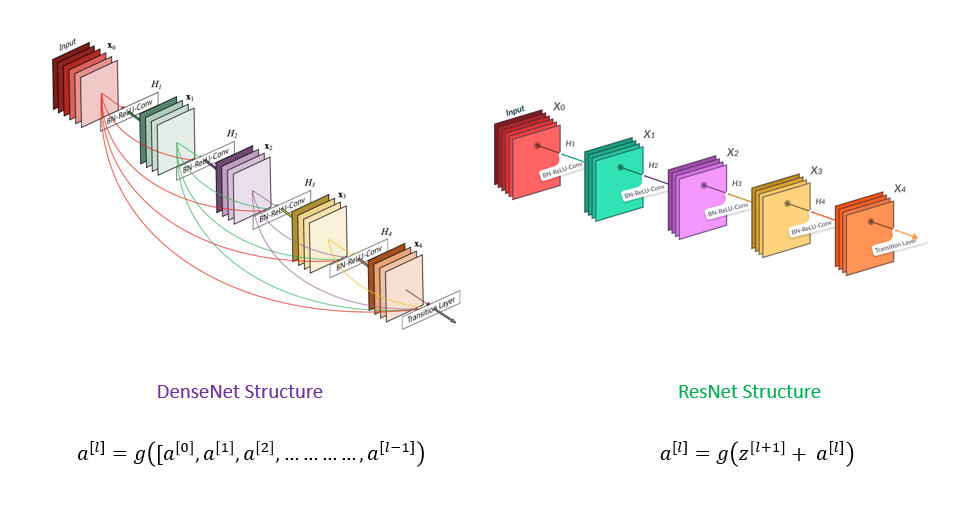

U narednoj ćeliji izvršeno je kreiranje modela DenseNet121. Pošto DenseNet121 predstavlja unapred istreniranu neuronsku mrežu koja se sastoji iz određenog broja layera, za kreiranje modela koristiće se već istrenirani layeri, ali će se dodati još layera, pri čemu je najvažniji poslednji layer, u okviru kog je broj neurona jednak broju klasa koje se predviđaju.

In [ ]:
from tensorflow.keras.applications import DenseNet121
dense_net = tf.keras.applications.DenseNet121()

dense_net_layer=Dropout(0.5)(dense_net.layers[-2].output)
number_of_classes = len(data_df['class_id'].unique())

last_layer = Dense(number_of_classes, activation="softmax")(dense_net_layer)
model = Model(dense_net.input, last_layer)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])

33202176/33188688 [==============================] - 1s 0us/step


U okviru naredne ćelije importovan je ModelCheckPoint i model je sačuvan na lokaciji model.h5, pri čemu će biti sačuvan onaj model koji ima najbolji validation accuracy.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='model.h5', monitor="val_accuracy", save_best_only=True, verbose=1)

Ukoliko se dostigne minimum, doći će do prestanka treniranja modela, jer dalje treniranje modela neće imati smisla. 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

U narednoj ćeliji vrši se treniranje modela. Može se uočiti da je za parametar *epochs* prosleđeno 50, ali s obzirom na to da model nakon određene epohe ne daje neke bolje rezultate, nije izvršeno svih 50 epoha.

In [ ]:
hist=model.fit(
    X_train_converted, 
    y_train_converted, 
    epochs=50, 
    validation_data=(X_val_converted, y_val_converted), 
    shuffle=True, 
    batch_size=10, 
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50
28/28 [==============================] - ETA: 0s - loss: 4.3685 - accuracy: 0.0366
Epoch 1: val_accuracy improved from -inf to 0.10145, saving model to model.h5
28/28 [==============================] - 35s 387ms/step - loss: 4.3685 - accuracy: 0.0366 - val_loss: 3.5430 - val_accuracy: 0.1014
Epoch 2/50
28/28 [==============================] - ETA: 0s - loss: 2.5319 - accuracy: 0.3077
Epoch 2: val_accuracy improved from 0.10145 to 0.28986, saving model to model.h5
28/28 [==============================] - 5s 178ms/step - loss: 2.5319 - accuracy: 0.3077 - val_loss: 2.6930 - val_accuracy: 0.2899
Epoch 3/50
28/28 [==============================] - ETA: 0s - loss: 1.3808 - accuracy: 0.6777
Epoch 3: val_accuracy improved from 0.28986 to 0.52174, saving model to model.h5
28/28 [==============================] - 5s 181ms/step - loss: 1.3808 - accuracy: 0.6777 - val_loss: 2.1320 - val_accuracy: 0.5217
Epoch 4/50
28/28 [==============================] - ETA: 0s - loss: 0.8686 - accurac

U narednim ćelijama izvršena je evaluacija modela. Može se uočiti da accuracy teži ka 1, što je dobro.

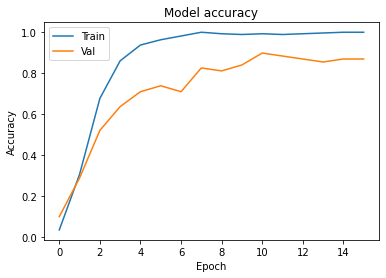

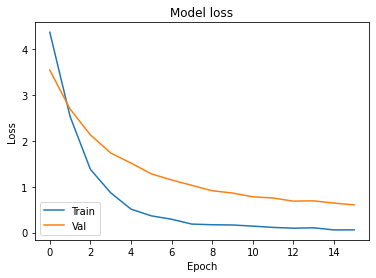

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower left')
plt.show()

U narednoj ćeliji učitan je model, na osnovu prethodno sačuvane lokacije.

In [ ]:
from tensorflow.keras import models as tf_models

model = tf_models.load_model('model.h5')

U nastavku dat je prikaz slika figurica, pri čemu iznad svake slike stoji predviđena vrednost klase kojoj pripada slika, dok se ispod slike nalazi stvarna vrednost klase kojoj pripada figurica. 

Class: 32 Minifigure: JANNAH


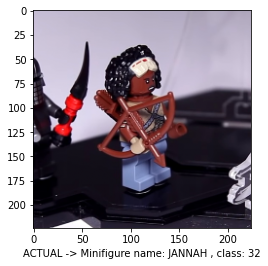

Class: 32 Minifigure: JANNAH


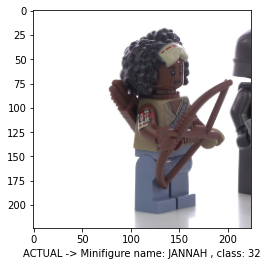

Class: 32 Minifigure: JANNAH


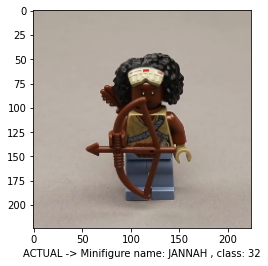

Class: 32 Minifigure: JANNAH


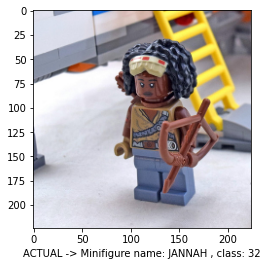

Class: 1 Minifigure: SPIDER-MAN


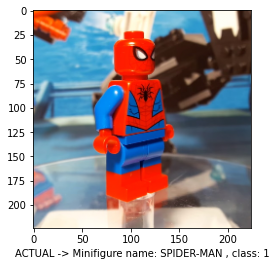

Class: 26 Minifigure: OWEN GRADY


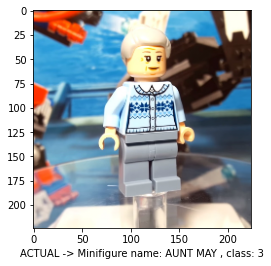

Class: 25 Minifigure: OUTRIDER 2


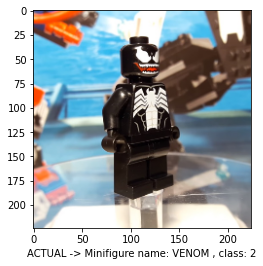

Class: 4 Minifigure: GHOST SPIDER


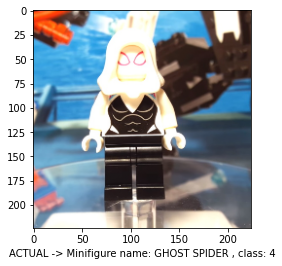

Class: 1 Minifigure: SPIDER-MAN


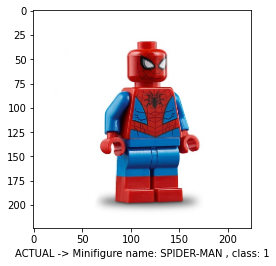

Class: 3 Minifigure: AUNT MAY


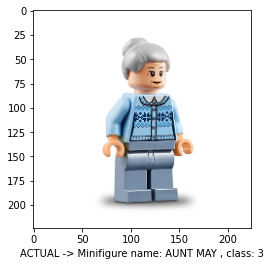

Class: 4 Minifigure: GHOST SPIDER


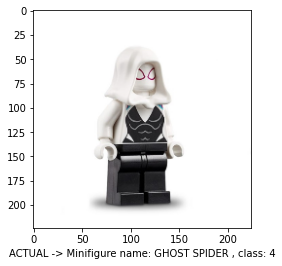

Class: 25 Minifigure: OUTRIDER 2


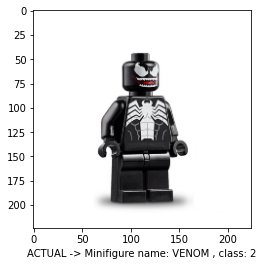

Class: 5 Minifigure: YODA


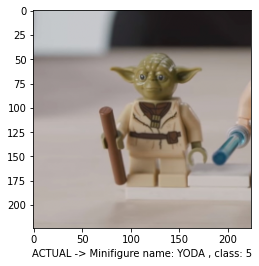

Class: 6 Minifigure: LUKE SKYWALKER


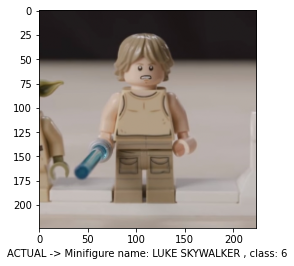

Class: 7 Minifigure: R2-D2


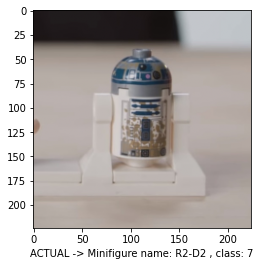

Class: 5 Minifigure: YODA


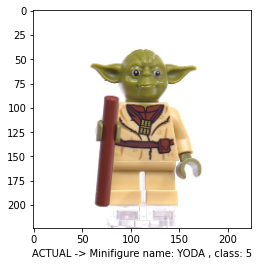

Class: 6 Minifigure: LUKE SKYWALKER


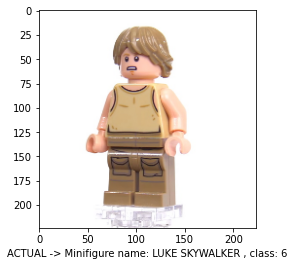

Class: 7 Minifigure: R2-D2


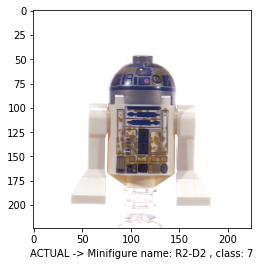

Class: 18 Minifigure: HARRY POTTER


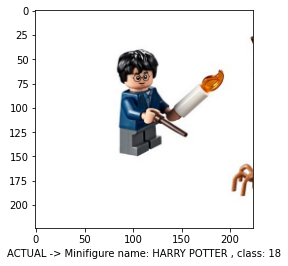

Class: 18 Minifigure: HARRY POTTER


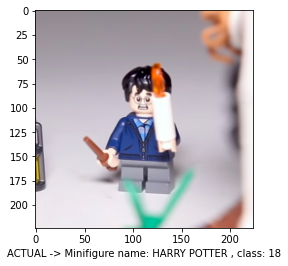

Class: 18 Minifigure: HARRY POTTER


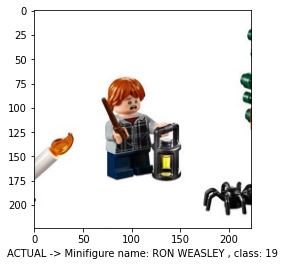

Class: 19 Minifigure: RON WEASLEY


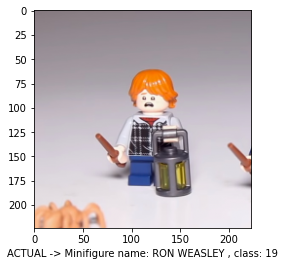

Class: 26 Minifigure: OWEN GRADY


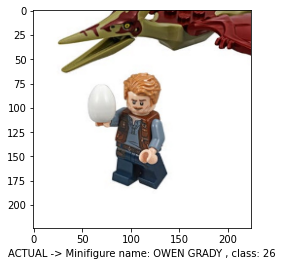

Class: 26 Minifigure: OWEN GRADY


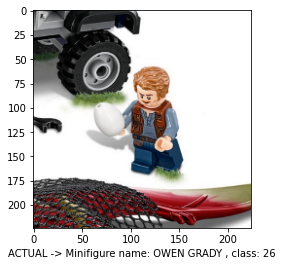

Class: 3 Minifigure: AUNT MAY


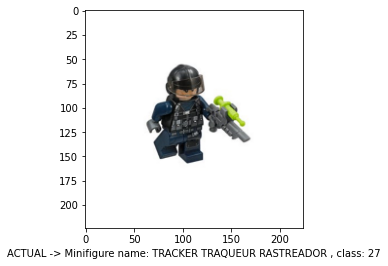

Class: 27 Minifigure: TRACKER TRAQUEUR RASTREADOR


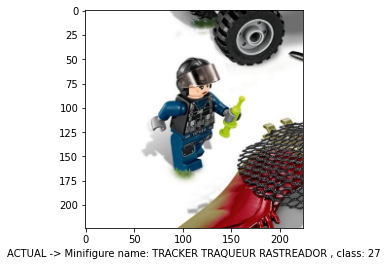

Class: 15 Minifigure: MYSTERIO


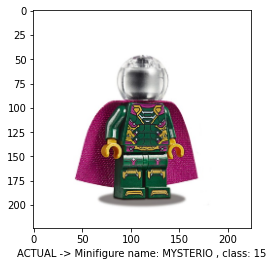

Class: 16 Minifigure: FIREFIGHTER


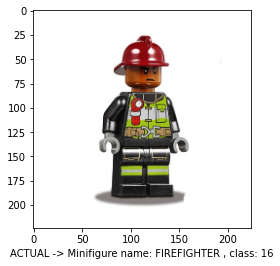

Class: 17 Minifigure: SPIDER-MAN


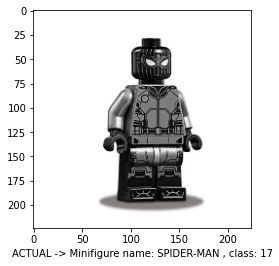

Class: 14 Minifigure: KLATOOINIAN RAIDER 2


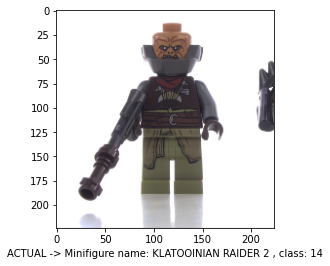

Class: 20 Minifigure: BLACK WIDOW


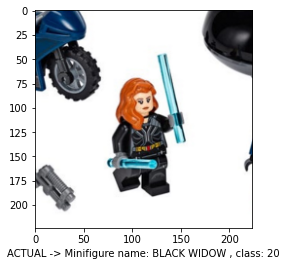

Class: 35 Minifigure: ANAKIN SKYWALKER


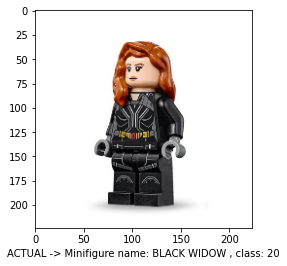

Class: 20 Minifigure: BLACK WIDOW


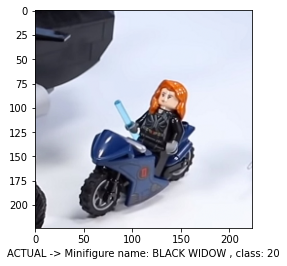

Class: 21 Minifigure: YELENA BELOVA


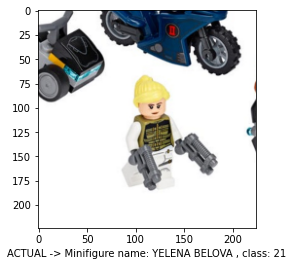

Class: 21 Minifigure: YELENA BELOVA


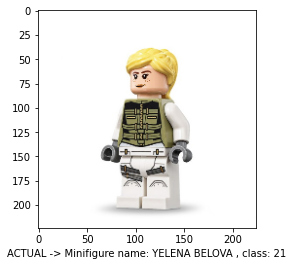

Class: 21 Minifigure: YELENA BELOVA


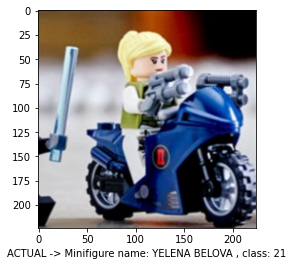

Class: 22 Minifigure: TASKMASTER


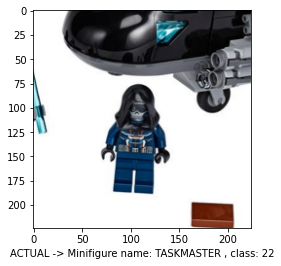

Class: 22 Minifigure: TASKMASTER


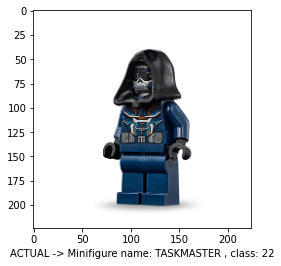

Class: 22 Minifigure: TASKMASTER


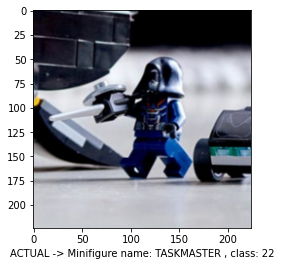

Class: 23 Minifigure: CAPTAIN AMERICA


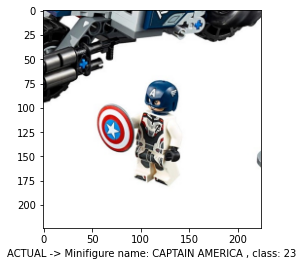

Class: 23 Minifigure: CAPTAIN AMERICA


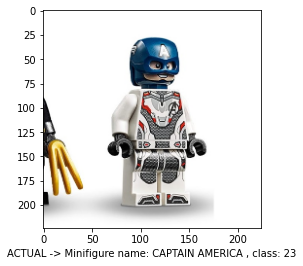

Class: 24 Minifigure: OUTRIDER 1


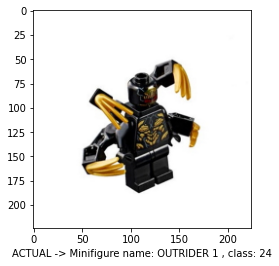

Class: 24 Minifigure: OUTRIDER 1


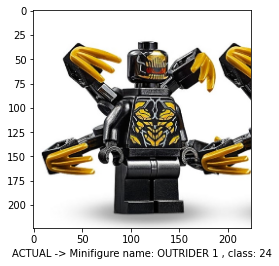

Class: 25 Minifigure: OUTRIDER 2


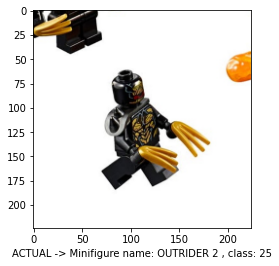

Class: 25 Minifigure: OUTRIDER 2


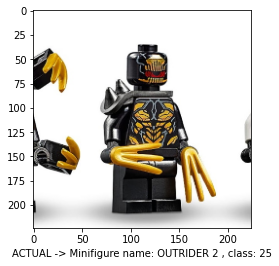

Class: 28 Minifigure: IRON MAN MK 1


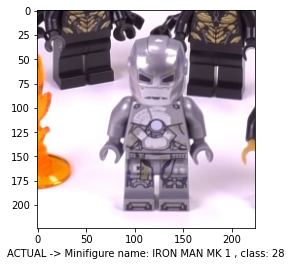

Class: 28 Minifigure: IRON MAN MK 1


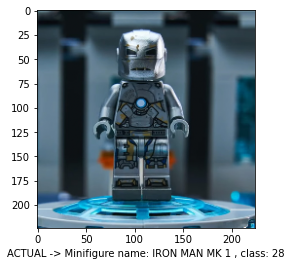

Class: 29 Minifigure: IRON MAN MK 5


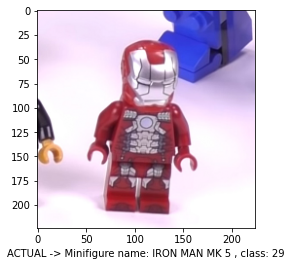

Class: 29 Minifigure: IRON MAN MK 5


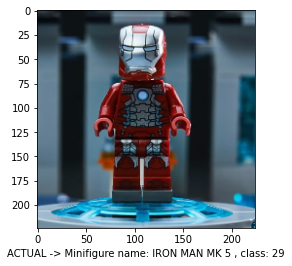

Class: 30 Minifigure: IRON MAN MK 41


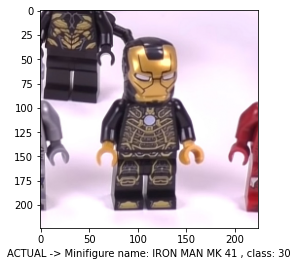

Class: 30 Minifigure: IRON MAN MK 41


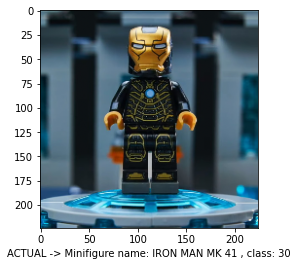

Class: 31 Minifigure: IRON MAN MK 50


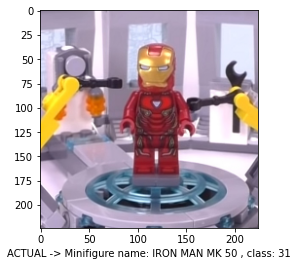

Class: 31 Minifigure: IRON MAN MK 50


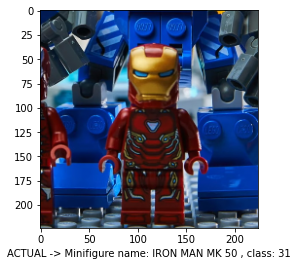

Class: 8 Minifigure: MACE WINDU


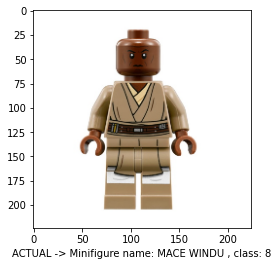

Class: 8 Minifigure: MACE WINDU


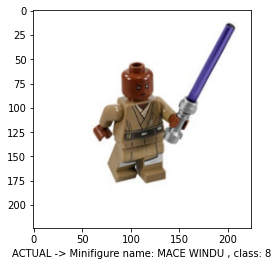

Class: 9 Minifigure: GENERAL GRIEVOUS


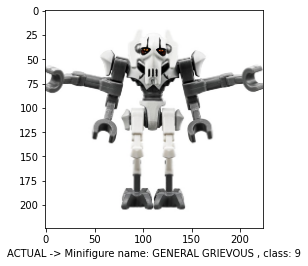

Class: 9 Minifigure: GENERAL GRIEVOUS


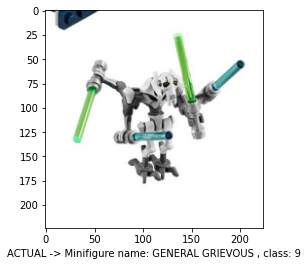

Class: 10 Minifigure: KYLO REN


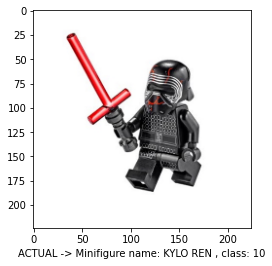

Class: 10 Minifigure: KYLO REN


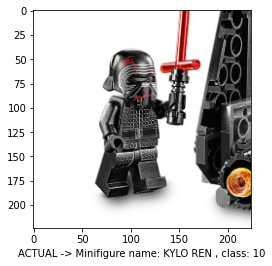

Class: 11 Minifigure: THE MANDALORIAN


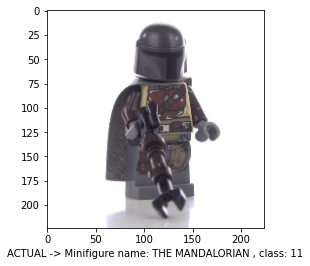

Class: 12 Minifigure: CARA DUNE


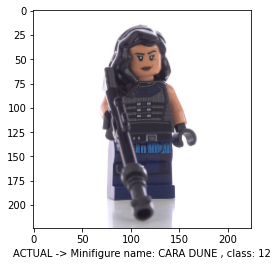

Class: 13 Minifigure: KLATOOINIAN RAIDER 1


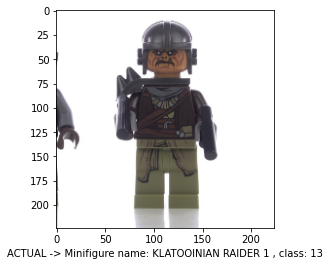

Class: 34 Minifigure: DARTH VADER


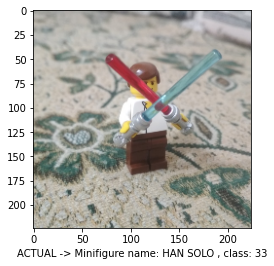

Class: 33 Minifigure: HAN SOLO


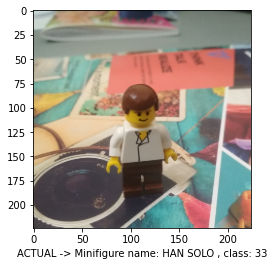

Class: 34 Minifigure: DARTH VADER


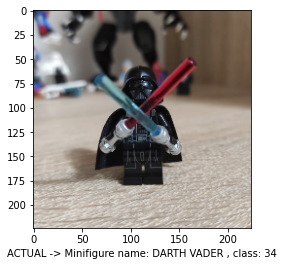

Class: 34 Minifigure: DARTH VADER


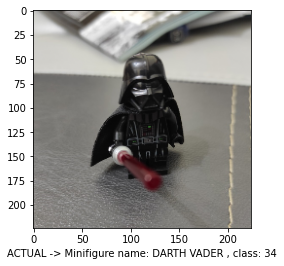

Class: 34 Minifigure: DARTH VADER


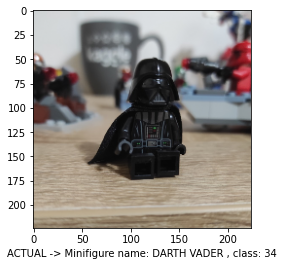

Class: 10 Minifigure: KYLO REN


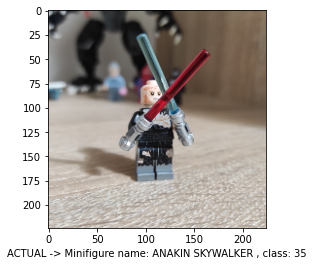

Class: 35 Minifigure: ANAKIN SKYWALKER


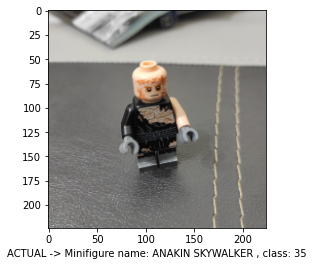

Class: 35 Minifigure: ANAKIN SKYWALKER


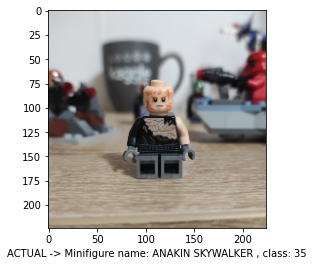

In [ ]:
for i in range(len(test_df)):
    
    image = cv2.imread(X_test['path'].values[i])
    image = cv2.resize(image, dsize=(224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)/255
    plt.imshow(image)
    plt.xlabel('ACTUAL -> Minifigure name: ' + test_actual_df['minifigure_name'].values[i]+' , class: '+str(test_actual_df['class_id'].values[i]))
    image = np.reshape(image, (1, 224, 224, 3))
    ans = model.predict(image).argmax()
    ans = ans+1
    minifigure = metadata_df["minifigure_name"][metadata_df["class_id"] == ans].iloc[0]
    print("Class:", str(ans)+ " Minifigure:",minifigure)
    plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_val_converted, y_val_converted, verbose=1)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

3/3 [==============================] - 4s 542ms/step - loss: 0.7816 - accuracy: 0.8986
Test loss: 0.7815545797348022
Test accuracy: 0.8985507488250732


# **2. ResNet50**

Kao i DenseNet121, i ResNet50 predstavlja konvolucijsku neuronsku mrežu koja se sastoji iz 50 slojeva. Predstavlja jednu od najkvalitetnijih i najkorišćenijih unapred istreniranih neuronskih mreža. [2]

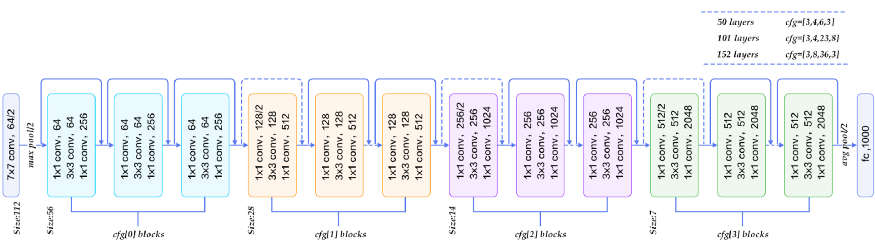

U suštini postupak koji je urađen za DenseNet121, urađen je i kod ResNet50. Ovde je važno napomenuti da se istrenirani layeri, ne treniraju opet, te da se to može uočiti u okviru linije *layer.trainable=False*. Nakon izvršenja naredne ćelije, mogu se uočiti layeri, kao i broj njihovih parametara.

In [ ]:
model3 = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   weights='imagenet',
                   input_shape=(224, 224, 3),
                   pooling='avg')

for layer in pretrained_model.layers:
        layer.trainable=False

model3.add(pretrained_model)
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(512, activation='relu'))
model3.add(tf.keras.layers.Dense(number_of_classes, activation='softmax'))

model3.summary()

94781440/94765736 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 35)                17955     
                                                                 
Total params: 24,662,947
Trainable params: 1,071,139
No

In [ ]:
model3.compile(
    optimizer=Adam(0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode='max', patience=5,  restore_best_weights=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( monitor = "accuracy", factor = 0.5, patience = 3, verbose = 0, min_lr = 0.0001 ) 
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, verbose=1)

In [ ]:
hist=model3.fit(X_train_converted, y_train_converted, validation_data=(X_val_converted, y_val_converted), batch_size = 10, epochs=100, callbacks=[checkpoint, early_stopping, learning_rate_reduction])


Epoch 1/100
28/28 [==============================] - ETA: 0s - loss: 3.5982 - accuracy: 0.0549
Epoch 1: val_accuracy did not improve from 0.89855
28/28 [==============================] - 7s 114ms/step - loss: 3.5982 - accuracy: 0.0549 - val_loss: 3.9019 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/100
27/28 [===========================>..] - ETA: 0s - loss: 3.1833 - accuracy: 0.1074
Epoch 2: val_accuracy did not improve from 0.89855
28/28 [==============================] - 1s 48ms/step - loss: 3.1788 - accuracy: 0.1062 - val_loss: 3.7840 - val_accuracy: 0.0290 - lr: 1.0000e-04
Epoch 3/100
27/28 [===========================>..] - ETA: 0s - loss: 2.9385 - accuracy: 0.1741
Epoch 3: val_accuracy did not improve from 0.89855
28/28 [==============================] - 1s 51ms/step - loss: 2.9392 - accuracy: 0.1722 - val_loss: 3.6998 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 4/100
27/28 [===========================>..] - ETA: 0s - loss: 2.7520 - accuracy: 0.2741
Epoch 4: val_accu

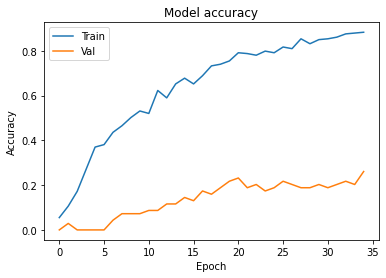

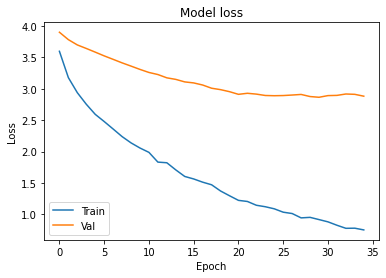

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower left')
plt.show()

Iz priloženog može se uočiti da prethodni model dalje bolje rezultate od ovog modela.

In [ ]:
loss, accuracy = model3.evaluate(X_val_converted, y_val_converted, verbose=1)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

3/3 [==============================] - 1s 250ms/step - loss: 2.8832 - accuracy: 0.2609
Test loss: 2.883160352706909
Test accuracy: 0.260869562625885


# **Zaključak**

U okviru projektnog zadatka izvršeno je učitavanje i analiza seta podataka, podela na trening i test podatke, kreiranje modela: DenseNet121 i ResNet50, kao i treniranje navedenih modela i evaluacija modela. Ono što se može zaključiti jeste da DenseNet121 model obezbeđuje dobre rezultate za prosleđene podatke. S druge strane, može se uvideti da bi set podataka sa većom količinom podataka, kao i sa raznovrsnijim podacima doveo do dosta boljih rezultata. 

# **Reference**

1.   https://www.pluralsight.com/guides/introduction-to-densenet-with-tensorflow
2.   https://blog.devgenius.io/resnet50-6b42934db431


